In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [ ]:
# Load dataset from repository root (no Colab dependency)
data_file = Path("1730285881-Airbnb_Open_Data.xlsx")
if not data_file.exists():
    raise FileNotFoundError(f"Data file not found: {data_file.resolve()}")
df = pd.read_excel(data_file, engine="openpyxl")
# Normalize column names early to use consistent identifiers throughout the notebook
df.columns = df.columns.str.replace(' ', '_').str.lower()
# Coerce common numeric columns to numeric types (safe conversion)
for col in ['price', 'number_of_reviews', 'availability_365']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
#Basic info & cleaning
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (102599, 26)

Column Names:
 Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Missing Values:
 id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                    

In [ ]:
# Drop rows with too many missing values (optional)
df = df.dropna(subset=['host_name', 'neighbourhood', 'price', 'number_of_reviews'])


Top 10 Hosts by Number of Listings:
 host name
Michael         877
David           761
John            577
Alex            545
Sonder (NYC)    516
Daniel          472
Karen           437
Sarah           434
Maria           422
Anna            399
Name: count, dtype: int64


/tmp/ipython-input-1274538184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="viridis")


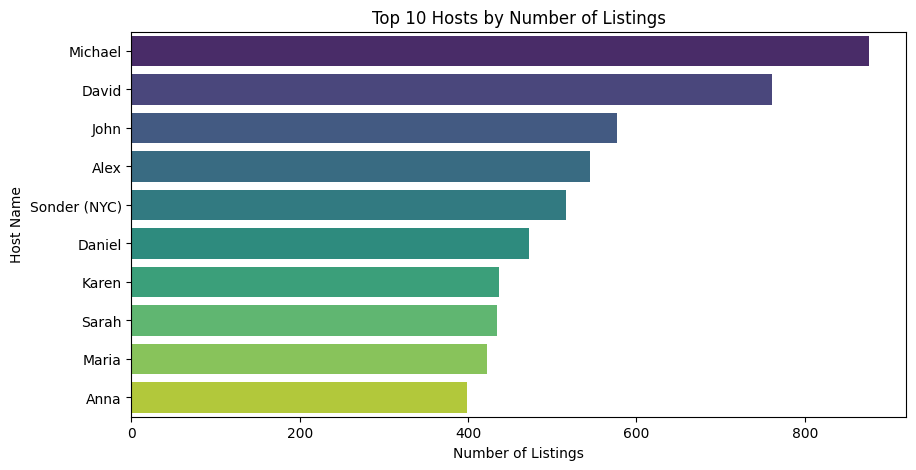

In [ ]:
# Top 10 hosts with most listings
top_hosts = df['host_name'].value_counts().head(10)
print("\nTop 10 Hosts by Number of Listings:\n", top_hosts)
plt.figure(figsize=(10,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="viridis")
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Host Name")
plt.tight_layout()
plt.show()


Top 10 Neighbourhoods:
 neighbourhood
Bedford-Stuyvesant    7879
Williamsburg          7712
Harlem                5415
Bushwick              4937
Hell's Kitchen        3942
Upper West Side       3822
Upper East Side       3651
East Village          3458
Midtown               3367
Crown Heights         3231
Name: count, dtype: int64


/tmp/ipython-input-3203074283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette="mako")


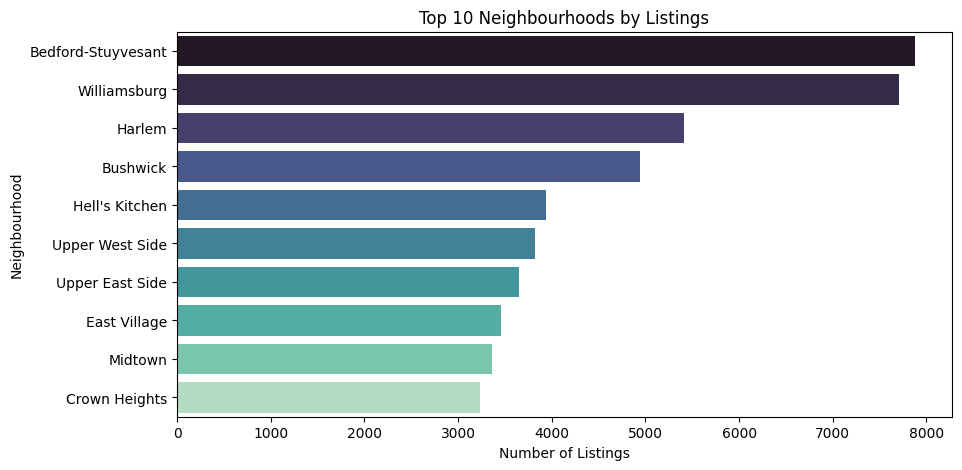

In [ ]:
# Most popular neighbourhoods
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
print("\nTop 10 Neighbourhoods:\n", top_neighbourhoods)
plt.figure(figsize=(10,5))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette="mako")
plt.title("Top 10 Neighbourhoods by Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()


Average Price per Neighbourhood:
 neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


/tmp/ipython-input-1471900445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette="coolwarm")


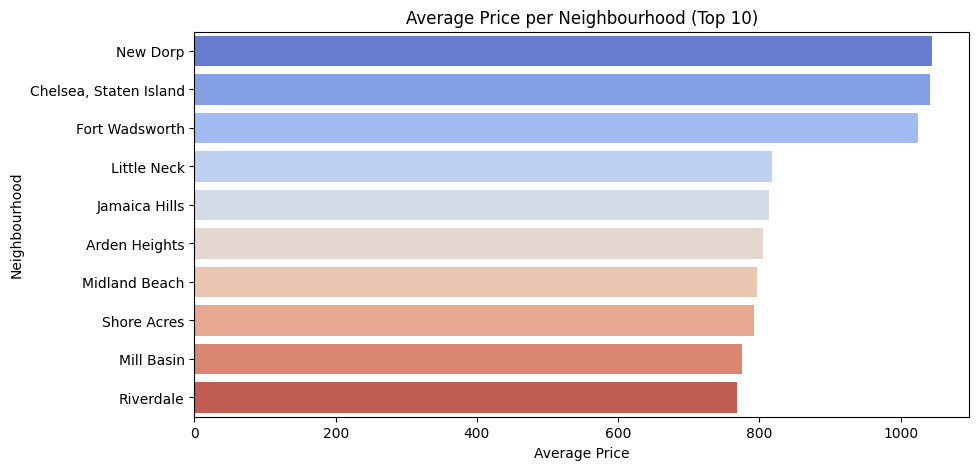

In [ ]:
# Average price per neighbourhood
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print("\nAverage Price per Neighbourhood:\n", avg_price)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price.values, y=avg_price.index, palette="coolwarm")
plt.title("Average Price per Neighbourhood (Top 10)")
plt.xlabel("Average Price")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()

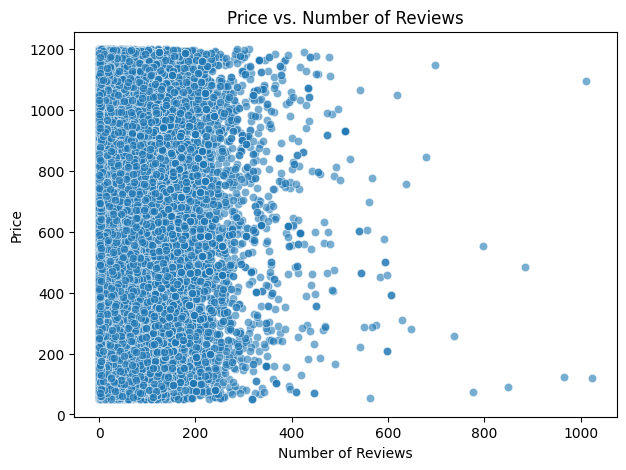


Correlation between Price and Number of Reviews: 0.00522924827311656


In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.6)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.tight_layout()
plt.show()
# Correlation
print("\nCorrelation between Price and Number of Reviews:", df['price'].corr(df['number_of_reviews']))


Room Type Distribution:
 room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


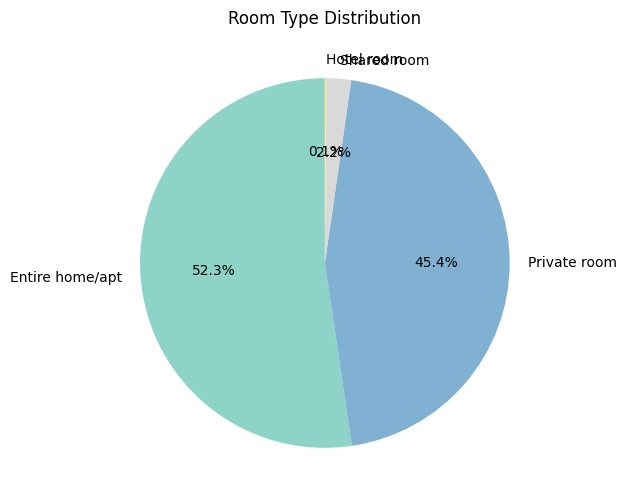

In [ ]:
# Room type distribution
room_type_counts = df['room_type'].value_counts()
print("\nRoom Type Distribution:\n", room_type_counts)
plt.figure(figsize=(6,6))
room_type_counts.plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.title("Room Type Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

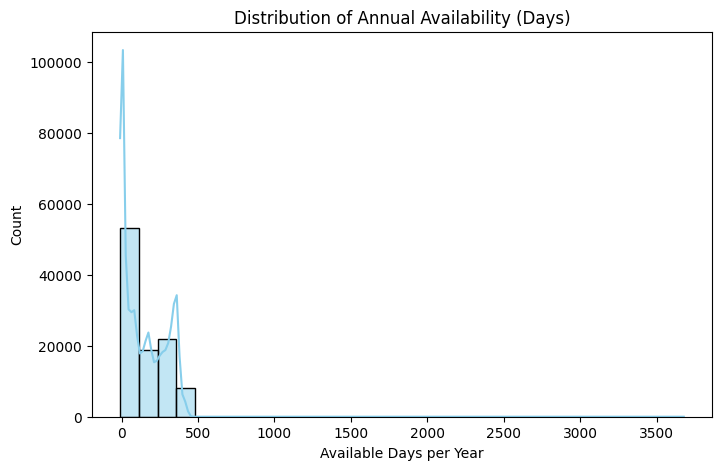

In [ ]:
# Availability trends
if 'availability_365' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['availability_365'].dropna(), bins=30, kde=True, color="skyblue")
    plt.title("Distribution of Annual Availability (Days)")
    plt.xlabel("Available Days per Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [ ]:
# ✅ Step 11: Summary insights
top_hosts = df['host_name'].value_counts().head(10)
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
room_type_counts = df['room_type'].value_counts()
print("\nKey Insights:")
if not top_hosts.empty:
    print("1. Top host:", top_hosts.index[0], "with", top_hosts.iloc[0], "listings.")
if not top_neighbourhoods.empty:
    print("2. Most popular neighbourhood:", top_neighbourhoods.index[0])
if not avg_price.empty:
    print("3. Highest average price area:", avg_price.index[0], "≈", round(avg_price.iloc[0], 2))
print("4. Correlation between price and reviews:", round(df['price'].corr(df['number_of_reviews']), 3))
if not room_type_counts.empty:
    print("5. Most common room type:", room_type_counts.index[0])


Key Insights:
1️.Top host: Michael with 881 listings.
2️.Most popular neighbourhood: Bedford-Stuyvesant
3️.Highest average price area: New Dorp ≈ 1045.0
4️.Correlation between price and reviews: 0.005
5️.Most common room type: Entire home/apt
